In [ ]:
import pandas as pd #importing pandas for data analyzing, cleaning, exploring, and manipulating
import matplotlib.pyplot as plt # importing plot library for data visualization

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Height-Weight Data.csv') # creating object to read|open the existing file

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum() #check the number of missing data

In [ ]:
df.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [ ]:
df.shape

(3501, 2)

In [ ]:
x = df[['Height']] # creating 2D array of Height column. Raise a value error if x is 1D array.
y = df[['Weight']] #creating 2D array of weight column. y can be okay with 1D.

In [ ]:
x.mean() # The mean value of Height column.

In [ ]:
y.mean() # The mean value of Weight column.

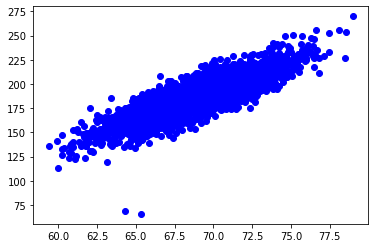

In [ ]:
plt.scatter(x,y, color='blue') # scatter() function plots one dot for each observation

In [ ]:
import warnings as wr
wr.filterwarnings('ignore') # ignoring warnings
from sklearn.linear_model import LinearRegression # Importing Regression(Linear) from sklearn module

In [ ]:
reg = LinearRegression() # Creating LinearRegression object




---


*  The sklearn **fit method** uses the training data as an input to train the machine learning model


---




In [ ]:
reg.fit(x,y) # training data || fit(x_train, y_train) , x_train = The features of the training dataset, y_train = The target dataset

LinearRegression()

In [ ]:
reg.coef_ #m(coefficient)

array([[5.95843786]])

In [ ]:
reg.intercept_ #c(intercept)

array([-224.38640537])



---
 *   Then once it’s trained, we can use other scikit learn methods – like **predict and score** – to continue with the machine learning process.
---



In [ ]:
reg.predict([[72]]) # y = reg.coef_ * 72 + reg.intercept_ , where y is the predicted value for the given x . 

array([[204.62112091]])

In [ ]:
reg.score(x, y) # training accuracy

0.7323584758139253

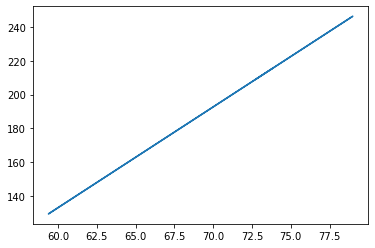

In [ ]:
plt.plot(x, reg.predict(x)) # plotting a best fit iine || plot(Height, Predicted value-y)

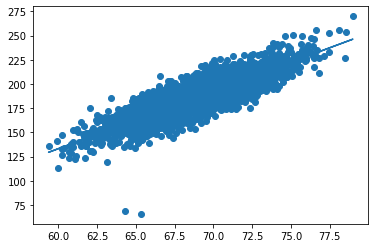

In [ ]:
plt.plot(df.Height, reg.predict(x))
plt.scatter(x,y) # The scatter() function plots one dot for each observation. 

In [ ]:
import numpy as np 

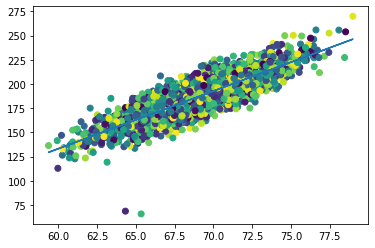

In [ ]:
colors = np.random.randint(100, size=(3501))
plt.plot(df.Height, reg.predict(x))
plt.scatter(x,y,c=colors)

In [ ]:
from sklearn.metrics import mean_squared_error # importing MSE for measuring loss value

In [ ]:
mean_squared_error(df[['Height']], reg.predict(df[['Height']])) # cost function || MSE 

14093.441594098935

In [ ]:
df['predicted_weight'] = reg.predict(x) # creating new column storing predicted value



In [ ]:
df.head(10)

In [ ]:
df['loss'] = abs(y - reg.predict(x))
df #fianl OUTPUT

,Height,Weight,predicted_weight,loss
0,73.847017,241.893563,215.626457,26.267106
1,68.781904,162.310473,185.446296,23.135824
2,74.110105,212.740856,217.194053,4.453197
3,71.730978,220.042470,203.018172,17.024298
4,69.881796,206.349801,191.999933,14.349867
...,...,...,...,...
3496,69.296830,185.649086,188.514450,2.865364
3497,70.542201,210.198845,195.934919,14.263926
3498,73.912549,202.429960,216.016926,13.586967
3499,67.396021,144.277671,177.188597,32.910926
